In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import scipy as scipy
from scipy.stats import ttest_ind
import os

In [16]:
gpt_natural_temp0 = pd.read_csv('gpt4o_results/df_natural_temp0.csv')
gpt_synthetic_temp0 = pd.read_csv('gpt4o_results/df_synthetic_temp0.csv')

# GPT4o Significance Results

In [17]:
gpt_n = gpt_natural_temp0.pipe(clean_df).assign(cat='natural')
gpt_s = gpt_synthetic_temp0.pipe(clean_df).assign(cat='synthetic')
all_temp0 = transform_df(gpt_n,gpt_s)
main_temp0 = all_temp0.loc[all_temp0['conditions']!='related',:]

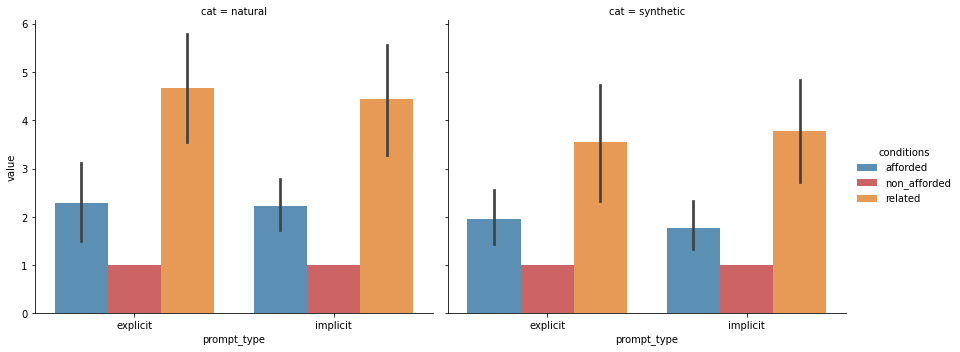

In [18]:
sns.catplot(data = all_temp0,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3','C1'],
            alpha= 0.8)

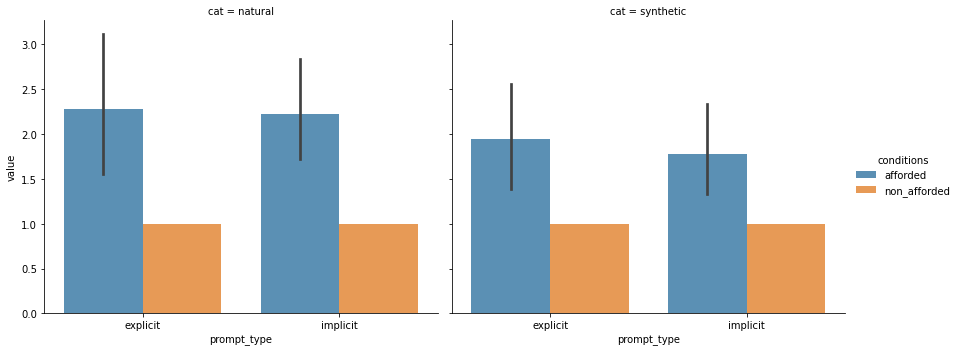

In [19]:
sns.catplot(data = main_temp0,
            x = "prompt_type",
            y = "value",
            hue = "conditions",
            col = "cat",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C1'],
            alpha= 0.8)

In [20]:
model = ols('value ~ C(conditions) + C(prompt_type) + C(conditions):C(prompt_type)', data=all_temp0).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result,'\n')

                                  sum_sq     df          F        PR(>F)
C(conditions)                 360.444444    2.0  64.074492  1.890936e-22
C(prompt_type)                  0.074074    1.0   0.026336  8.712395e-01
C(conditions):C(prompt_type)    0.148148    2.0   0.026336  9.740114e-01
Residual                      590.666667  210.0        NaN           NaN 



In [21]:
afforded = main_temp0.loc[main_temp0['conditions']=='afforded']
non_afforded = main_temp0.loc[main_temp0['conditions']=='non_afforded']
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Ttest_indResult(statistic=6.525060303179801, pvalue=1.1167507466786768e-09)

In [22]:
print('Natural Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='natural')]
non_afforded = main_temp0.loc[(main_temp0['conditions']=='non_afforded') & (main_temp0['cat']=='natural')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Natural Dataset T Test


Ttest_indResult(statistic=4.8776573050490635, pvalue=6.488662544707969e-06)

In [23]:
print('Synthetic Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='synthetic')]
non_afforded = main_temp0.loc[(main_temp0['conditions']=='non_afforded') & (main_temp0['cat']=='synthetic')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value']) 

Synthetic Dataset T Test


Ttest_indResult(statistic=4.397905821885158, pvalue=3.8196806763062414e-05)

# Significance Results

## ANOVA

In [25]:
model = ols('value ~ C(conditions) + C(prompt_type) + C(conditions):C(prompt_type)', data=all_temp0).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result,'\n')

                                  sum_sq     df          F        PR(>F)
C(conditions)                 360.444444    2.0  64.074492  1.890936e-22
C(prompt_type)                  0.074074    1.0   0.026336  8.712395e-01
C(conditions):C(prompt_type)    0.148148    2.0   0.026336  9.740114e-01
Residual                      590.666667  210.0        NaN           NaN 



## T Test Full Data Set

In [27]:
afforded = main_temp0.loc[main_temp0['conditions']=='afforded']
non_afforded = main_temp0.loc[main_temp0['conditions']=='non_afforded']
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Ttest_indResult(statistic=6.525060303179801, pvalue=1.1167507466786768e-09)

## T Test Separate Data Set

In [28]:
print('Natural Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='natural')]
non_afforded = main_temp0.loc[(main_temp0['conditions']=='non_afforded') & (main_temp0['cat']=='natural')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Natural Dataset T Test


Ttest_indResult(statistic=4.8776573050490635, pvalue=6.488662544707969e-06)

In [29]:
print('Synthetic Dataset T Test')
afforded = main_temp0.loc[(main_temp0['conditions']=='afforded') & (main_temp0['cat']=='synthetic')]
non_afforded = main_temp0.loc[(main_temp0['conditions']=='non_afforded') & (main_temp0['cat']=='synthetic')]
ttest_ind(afforded.loc[:,'value'], non_afforded.loc[:,'value'])

Synthetic Dataset T Test


Ttest_indResult(statistic=4.397905821885158, pvalue=3.8196806763062414e-05)